# Questão 11

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

users = ['A','B','C','D','E']
movies = ['Titanic', 'Rocky', 'The Hobbit', 'Fight Club', 'Jurassic Park']
matrix = [[0.82,0.18,0.5,0.1,0.26],
          [0.74,0.26,0.5,0.2,0.32],
          [0.34,0.69,0.5,0.7,0.62],
          [0.58,0.42,0.5,0.4,0.44],
          [0.1,0.9,0.5,1,0.8]]

users_movies = pd.DataFrame(data=matrix, index=users, columns=movies)
users_movies.T

,A,B,C,D,E
Titanic,0.82,0.74,0.34,0.58,0.1
Rocky,0.18,0.26,0.69,0.42,0.9
The Hobbit,0.50,0.50,0.50,0.50,0.5
Fight Club,0.10,0.20,0.70,0.40,1.0
Jurassic Park,0.26,0.32,0.62,0.44,0.8


(a) Calcule o fatora ̧c ̃ao aproximada (SVD) com 2 componentes para a
transposta dessa matriz (Filmes por usuários).

In [34]:
A = users_movies.T
	
u, s, v = np.linalg.svd(A, full_matrices=False)

u_2 = u[:, :2]
s_2 = s[:2]
v_2 = v[:2, :]

u_2 @ np.diag(s_2) @ v_2

array([[0.82007262, 0.74013871, 0.33885906, 0.58027091, 0.1006675 ],
       [0.1809277 , 0.26177214, 0.67542407, 0.42346101, 0.90852763],
       [0.49982665, 0.49966886, 0.50272361, 0.49935329, 0.49840656],
       [0.0995192 , 0.19908155, 0.70755429, 0.39820626, 0.99558037],
       [0.25964218, 0.31931648, 0.62562202, 0.43866507, 0.79671084]])

(b) Desenhe os filmes em dimens ̃ao dois (pode ser na m ̃ao ou em Python
ou Julia) baseado no resultado da quest ̃ao anterior.

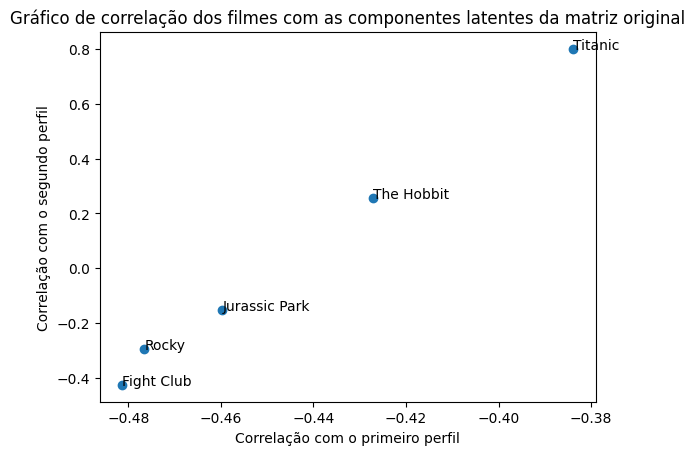

In [36]:
fig, ax = plt.subplots()
u_t = u_2.T # Cada entrada do array N representa a correlação do filme entrada com a componente latente N (Perfil)
ax.scatter(u_t[0, :], u_t[1, :])

for i, name in enumerate(movies):
    ax.annotate(name, (u_t[0, i], u_t[1, i]))

ax.set_xlabel('Correlação com o primeiro perfil')
ax.set_ylabel('Correlação com o segundo perfil')
ax.set_title('Gráfico de correlação dos filmes com as componentes latentes da matriz original')

plt.show()

Podemos pensar na matriz U como uma matriz que correlaciona cada filme a um determinado perfil de opções, ou componente latente. Essa componente latente é uma variável estatística não observável que pode explicar padrões de comportamento em um conjunto de dados.

Como reduzimos para duas dimensões, temos apenas dois componentes latentes presentes nessa decomposição SVD. Assim, filmes que estão próximos um dos outros possuem perfis de avaliação semelhantes, enquanto filmes que estão distantes um do outro possuem perfis de avaliação diferentes. Dessa forma, podemos sugerir filmes baseado nessa regra. Para identificar os usuários em cada "perfil", basta olhar a matriz de vetores singulares V, pois nela existe a correlação de cada usuário com os componentes latentes. 

Se alguém gostou de Titanic, recomenda-se O Hobbit.

# Questão 12

In [7]:
imagem = [[1,0,1,0,1],
          [1,0,1,0,1],
          [1,1,.5,1,1],
          [0,1,1,1,0],
          [1,0,0,0,1]]

u, s, v = np.linalg.svd(imagem, full_matrices=False)

def toRank(k,u,s,v):
    u_k = u[:, :k]
    s_k = s[:k]
    v_k = v[:k, :]

    return u_k @ np.diag(s_k) @ v_k



for k in range(1,6,1):
    buffer = toRank(k, u, s, v)
    print(f'fatoracação para {k}:', buffer )
    print(f'Erro, para k={k}: ', np.linalg.norm(imagem - buffer))

fatoracação para 1: [[0.90832618 0.42078473 0.74983971 0.42078473 0.90832618]
 [0.90832618 0.42078473 0.74983971 0.42078473 0.90832618]
 [1.07348159 0.49729345 0.88617849 0.49729345 1.07348159]
 [0.56322738 0.26091671 0.4649544  0.26091671 0.56322738]
 [0.64294487 0.29784607 0.53076263 0.29784607 0.64294487]]
Erro, para k=1:  2.0639038137892203
fatoracação para 2: [[ 1.09263337  0.11218867  0.6496622   0.11218867  1.09263337]
 [ 1.09263337  0.11218867  0.6496622   0.11218867  1.09263337]
 [ 0.86841892  0.8406416   0.99763735  0.8406416   0.86841892]
 [ 0.07068557  1.0856076   0.73266839  1.0856076   0.07068557]
 [ 0.89603335 -0.12591444  0.39320004 -0.12591444  0.89603335]]
Erro, para k=2:  0.9834897575640651
fatoracação para 3: [[1.00000000e+00 2.46998765e-16 1.00000000e+00 1.98417765e-16
  1.00000000e+00]
 [1.00000000e+00 1.55656268e-16 1.00000000e+00 1.07075268e-16
  1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 5.00000000e-01 1.00000000e+00
  1.00000000e+00]
 [1.82305526e-17 1.00

O algoritmo tentará trazer uma matrix de posto 3 para uma matriz de posto K, sendo K uma entrada da nossa rotina. Acontece que a matriz dada é, naturalmente, uma matriz de posto 3. Dessa forma, qualquer tentativa de reduzir sua dimensão irá incorrer em uma perda de informação, consequentemente, um erro maior. Isso explica o fato das matrizes para K = 1 e K = 2 possuírem erros tão grandes. Conforme K tende ao valor do seu posto natural, o erro tende a zero. 

# Questão 14

/home/bocampagni/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


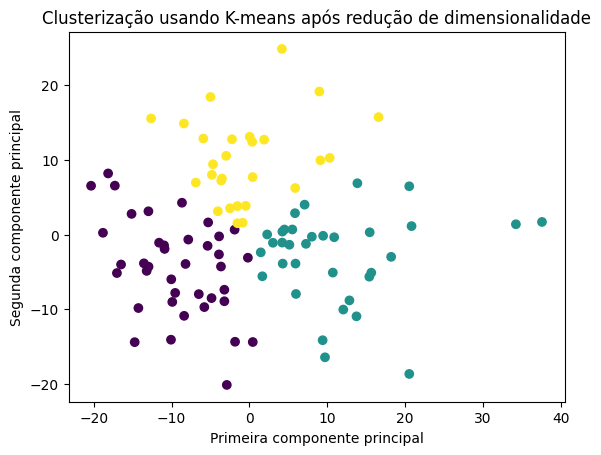

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Gerando dados aleatórios para exemplo
np.random.seed(42)
altura = np.random.normal(170, 10, 100)
peso = np.random.normal(70, 10, 100)
idade = np.random.normal(30, 5, 100)
imc = peso / ((altura/100)**2)
X = np.column_stack((altura, peso, idade, imc))

# Redução de dimensionalidade para duas dimensões usando PCA
pca = PCA(n_components=2)
X_reduzido = pca.fit_transform(X)

# Aplicando o algoritmo K-means para clusterizar os dados
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reduzido)
y_kmeans = kmeans.predict(X_reduzido)

# Visualizando os resultados da clusterização
plt.scatter(X_reduzido[:, 0], X_reduzido[:, 1], c=y_kmeans, cmap='viridis')
plt.title('Clusterização usando K-means após redução de dimensionalidade')
plt.xlabel('Primeira componente principal')
plt.ylabel('Segunda componente principal')
plt.show()